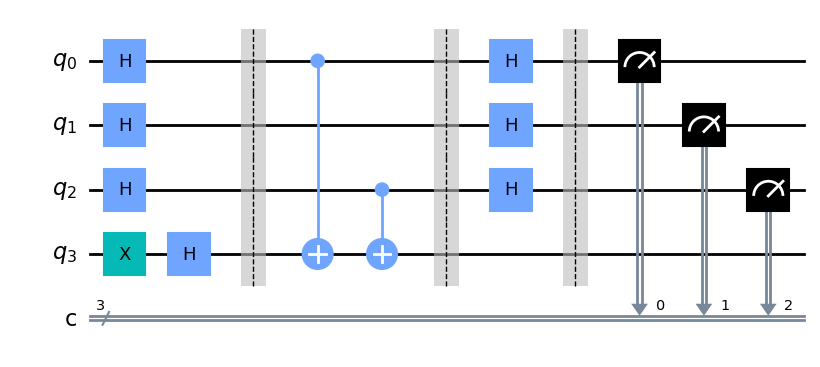

In [23]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
# secret number is a n bit string of binary values , our goal is to figure out the string 
sn='101'
# let us create a quantumcircuit that has n qubit( n= length of string +1) and n-1  classical bit (or) register
c1= QuantumCircuit(len(sn)+1,len(sn))
#applying hadamard gate to all the qubit except the last one 
c1.h(range(len(sn)))
#applying pauli-x gate to the last qubit 
c1. x(len(sn))
#applying hadamard gate to the last qubit 
c1.h(len(sn))
c1.barrier()
# using for loop to identify the '1 ' in the given string
for ii, yesno in enumerate(reversed(sn)):
    if yesno=='1':
        c1.cx(ii,len(sn))




c1.barrier()
# applying hadamard gate to all the register  
c1.h(range(len(sn)))
c1.barrier()
# measuring in classsical register
c1.measure(range(len(sn)),range(len(sn)))
c1.draw(output='mpl')

{'101': 1}


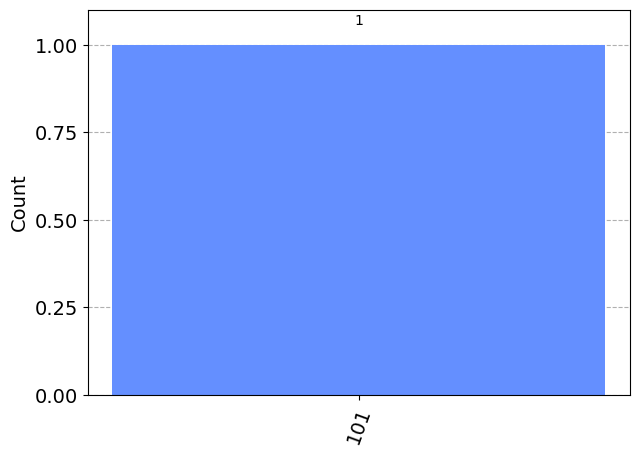

In [24]:
 # running the above code in the aer backend simulator 
simulator= Aer.get_backend('qasm_simulator')
result= execute(c1, backend= simulator,shots=1).result()
counts=result.get_counts()
print(counts)
plot_histogram(counts)